# Problem Statement:

An online company wants to determine the impact of raising shipment cost strategy on customer behavior and satisfaction. They raised shipment cost to some customers (referred to as the "new group") while keeping the old pricing model for other customers (referred to as the "old group"). The company wants to evaluate whether the new pricing model leads to lower customer satisfaction (measured by Net Promoter Score - NPS), decreassed customer purchases, and lower repurchase rates compared to the old pricing model.


## Dataset Description:  

The dataset contains the following columns:

user_id: An identifier for each user.\
paid: A binary variable indicating whether the user made a purchase (1) or not (0).\
NPS: The Net Promoter Score given by the user. Some users have not participated, represented as -1.\
repurchase: A binary variable indicating whether the user made a repurchase (1) or not (0).\

## Objective: 

The objective of this A/B test is to analyze the impact of the new pricing model on customer behavior and satisfaction compared to the old pricing model. Specifically, we aim to answer the following questions:

Does the new shipment cost lead to a lower NPS compared to the old pricing model?
Does the new shipment cost result in a lower percentage of customers making a purchase compared to the old pricing model?
Does the new shipment cost result in a lower repurchase rate compared to the old pricing model?
By comparing the new group (users exposed to the new shipment cost) with the old group (users under the old shipment cost), we can assess the effectiveness and potential risk of the new shipment cost.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

In [43]:

# set the random seed for reproducibility
np.random.seed(42)

# define the sample size and the number of features
n = 1000 # number of users
k = 5 # number of features

# create a numpy array of random numbers with shape (n, k)
data = np.random.rand(n, k)

# create a pandas DataFrame from the numpy array
df = pd.DataFrame(data, columns=['user_id', 'pricing', 'paid', 'nps', 'repurchase'])

# scale the user_id column to be integers from 1 to n
df['user_id'] = (df['user_id'] * n).astype(int) + 1

# scale the pricing column to be binary (0 or 1) with probability 0.5 for old and new cost
df['pricing'] = np.random.binomial(1, 0.5, n)

# scale the paid column to be binary (0 or 1) with probability 0.8 for old cost and 0.6 for new cost
df['paid'] = np.where(df['pricing'] == 1, np.random.binomial(1, 0.6, n), np.random.binomial(1, 0.8, n))

# Generate NPS, with some users not participating (represented as NULL values)
nps_mask = np.random.choice([True, False], size=n, p=[0.25, 0.75])
nps_values = np.random.randint(0, 11, size=n)
nps_values[~nps_mask] = -1
df['nps'] = np.where(df['pricing'] == 1, nps_values, np.random.randint(0, 11, size=n))

# scale the repurchase column to be binary (0 or 1) with probability 0.7 for old cost and 0.5 for new cost
df['repurchase'] = np.where(df['pricing'] == 1, np.random.binomial(1, 0.5, n), np.random.binomial(1, 0.7, n))

# display the first 10 rows of the DataFrame
df.head(10)

,user_id,pricing,paid,nps,repurchase
0,375,0,1,7,1
1,156,0,1,8,1
2,21,1,0,0,1
3,184,0,1,5,1
4,612,1,1,-1,0
5,786,0,1,10,1
6,608,1,1,-1,0
7,809,1,1,-1,1
8,123,0,1,5,1
9,663,0,1,2,1


# building Hypothesis

H0 : M1=M2 (There is no difference between old and new project.)\
H1 : M1!=M2 (There is quite difference between each other)\


In [45]:
df[['pricing','paid', 'repurchase']].groupby('pricing').mean()

,paid,repurchase
pricing,,
0,0.806706,0.684418
1,0.628803,0.480730


In [48]:
df[df.nps!=-1][['pricing','nps']].groupby('pricing').mean()

,nps
pricing,
0,4.857988
1,4.807407


🎈🎈
We can see difference easily but it can be randomly

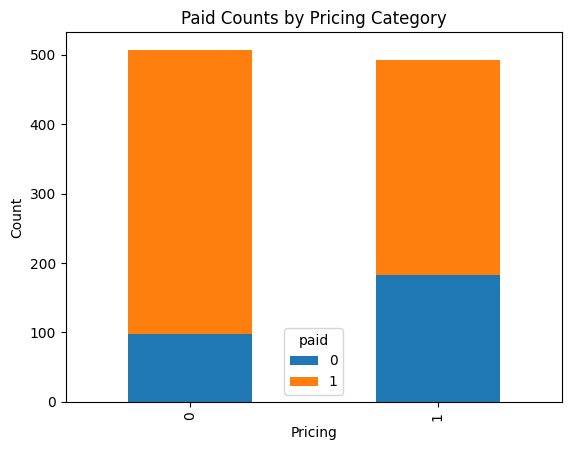

In [34]:

# Visualizations

# Bar plot for paid column by pricing category
paid_counts = df.groupby(['pricing', 'paid']).size().unstack()
paid_counts.plot(kind='bar', stacked=True)
plt.xlabel('Pricing')
plt.ylabel('Count')
plt.title('Paid Counts by Pricing Category')
plt.show()


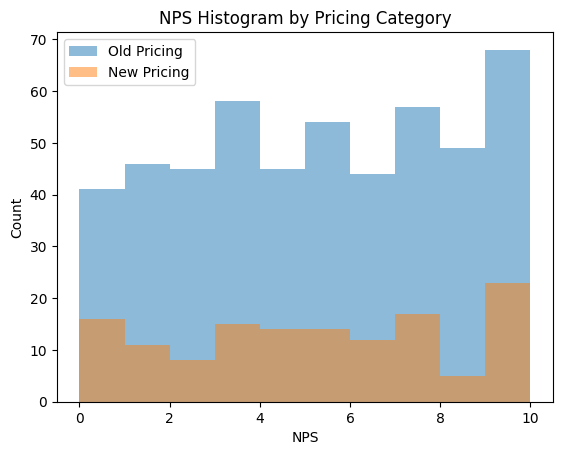

In [49]:

# Histogram of NPS by pricing category
nps_hist = df[df['nps'] != -1].groupby('pricing')['nps']
plt.hist(nps_hist.get_group(0), alpha=0.5, label='Old Pricing')
plt.hist(nps_hist.get_group(1), alpha=0.5, label='New Pricing')
plt.xlabel('NPS')
plt.ylabel('Count')
plt.title('NPS Histogram by Pricing Category')
plt.legend()
plt.show()


In [52]:
# A/B Test

# Conduct t-test for NPS
old_nps = df[df.nps>=0].loc[df['pricing'] == 0, 'nps']
new_nps = df[df.nps>=0].loc[df['pricing'] == 1, 'nps']

t_stat, p_value = stats.ttest_ind(old_nps, new_nps, nan_policy='omit')

print("A/B Test Result:")
print("NPS: t-statistic = {:.3f}, p-value = {:.10f}".format(t_stat, p_value))

A/B Test Result:
NPS: t-statistic = 0.172, p-value = 0.8633095381


🎈🎈Since the p value is not less than 0.05 the h0 hypothesis cannot be rejected. the h0 hypothesis cannot be rejected. So, There is no statistically significant difference between, the Control and Test group and raising shipment cost will not affect satisfaction of customers that much.

In [56]:
# A/B Test

# Conduct t-test for NPS
old_paid = df.loc[df['pricing'] == 0, 'paid']
new_paid = df.loc[df['pricing'] == 1, 'paid']

t_stat, p_value = stats.ttest_ind(old_paid, new_paid, nan_policy='omit')

print("A/B Test Result:")
print("NPS: t-statistic = {:.3f}, p-value {}".format(t_stat, p_value))

A/B Test Result:
NPS: t-statistic = 6.377, p-value 2.753266904837402e-10


🎈The t-statistic is 6.377, which means that the difference in the mean paid is 6.377 standard errors away from zero. The p-value is 2.753266904837402e-10, which means that the probability of observing such a large difference by chance is extremely low, almost zero. This indicates that the new shipment cost has a negative and strong impact on the customer paying and closing basket.

In [57]:
# A/B Test

# Conduct t-test for NPS
old_repurchase = df.loc[df['pricing'] == 0, 'repurchase']
new_repurchase = df.loc[df['pricing'] == 1, 'repurchase']

t_stat, p_value = stats.ttest_ind(old_repurchase, new_repurchase, nan_policy='omit')

print("A/B Test Result:")
print("NPS: t-statistic = {:.3f}, p-value {}".format(t_stat, p_value))

A/B Test Result:
NPS: t-statistic = 6.671, p-value 4.208891845447773e-11


there is no statistically significant difference between the control and test groups in NPS, indicating that raising shipment cost will not significantly affect customer satisfaction. However, the second and third conclusion states that the new shipment cost has a negative and strong impact on customer paying, closing basket and retention .
